# Mecanica cuántica: Sesión 2

### Ecuación de Schrödinger: Estado fundamental y solución de ecuaciones algebráicas no lineales

##### **Ecuación de Schrödinger independiente del tiempo**

$$
- \frac{\hbar^2}{2 m}\frac{d \psi (x)}{dx^2} + V(x) \psi(x) = E \psi(x)
$$

Para el potencial de barrera

$$
V(x) = \begin{cases}
-V_0, & x < a \\
0, & a \leq x
\end{cases}
$$

Solución:

$$
\sqrt{2 m (V_0 - |E|)}
\cot\left(\frac{\sqrt{2 m a^2 \left(V_0 - |E|\right)}}{\hbar}\right)
= - \sqrt{2 m |E|}
$$

$$
f(E) = \sqrt{2 m (V_0 - |E|)}
\cot\left(\frac{\sqrt{2 m a^2 \left(V_0 - |E|\right)}}{\hbar}\right)
+ \sqrt{2 m |E|}
$$

Gráfico:

In [40]:
%matplotlib inline

In [41]:
import numpy as np

def f(E, a, m, Vo, hbar):
    return (
        np.sqrt(2 * m * (Vo - np.abs(E))) / 
        np.tan(np.sqrt(2 * m * (a ** 2) * (Vo - np.abs(E))) / hbar) + 
        np.sqrt(2 * m * np.abs(E))
    )

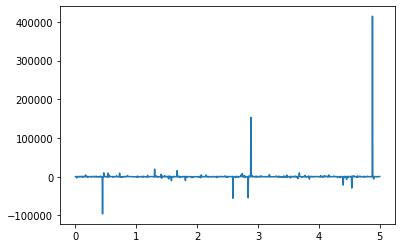

In [44]:
from matplotlib import pyplot as plt
a  = 2                   # fm
m  = 938                 # MeV
Vo = 20                  # MeV
hbar = 6.582119569e-22   # MeV

E = np.linspace(0, 5, 1000)
fE = [f(e, a, m, Vo, hbar) for e in E]

plt.plot(E, fE)
plt.show()

**Tarea:** realizar el grafico anterior con los datos correctos para el deuteron

<img src="./f_E.png">

##### **Método de bisección**

In [88]:
def bisection_v1(f, a, b, N):
    for i in range(0, N):
        fa = f(a)
        fb = f(b)

        if (fa*fb > 0):
            raise ValueError("Los valores de f(a) y f(b) tienen el mismo signo.")

        if fa == 0:
            return (a, fa)

        if fb == 0:
            return (b, fb)

        c = 0.5 * (a + b)
        fc = f(c)

        if fc == 0:
            return (c, fc)

        if (fc*fa < 0):
            a = a # A sigue siendo a
            b = c
        elif (fc*fb < 0):
            a = c
            b = b # A sigue siendo a
    else:
        raise ValueError("Los valores de f(a) y f(b) hacen fallar el metodo.")

In [95]:
def bisection_v2(f, a, b, eps):
    i = 0
    while True:
        fa = f(a)
        fb = f(b)

        if (fa*fb > 0):
            raise ValueError("Los valores de f(a) y f(b) tienen el mismo signo.")

        if np.abs(fa) < eps:
            return (a, fa, i)

        if np.abs(fb) < eps:
            return (b, fb, i)

        c = 0.5 * (a + b)
        fc = f(c)

        if np.abs(fc) < eps:
            return (c, fc, i)

        if (fc*fa < 0):
            a = a # A sigue siendo a
            b = c
            
        elif (fc*fb < 0):
            a = c
            b = b # A sigue siendo a

        i = i + 1

In [114]:
def bisection_v3(f, a, b, eps=1e-10, N=1000):
    i = 0
    while True:
        fa = f(a)
        fb = f(b)

        if (fa*fb > 0):
            raise ValueError("Los valores de f(a) y f(b) tienen el mismo signo.")

        if np.abs(fa) < eps:
            return (a, fa, i)

        if np.abs(fb) < eps:
            return (b, fb, i)
        
        # Biseccion
        c = 0.5 * (a + b)
        fc = f(c)

        if np.abs(fc) < eps:
            return (c, fc, i)

        if (fc*fa < 0):
            a = a # A sigue siendo a
            b = c
            
        elif (fc*fb < 0):
            a = c
            b = b # A sigue siendo a

        i = i + 1
        
        if i > N:
            print(c, fc, i)
            raise ValueError("Los valores de f(a) y f(b) hacen fallar el metodo.")

In [144]:
import numpy as np

def f(x):
    return np.cos(x)

def g(x):
    return x**3 - x**2 - 1

def phi(x):
    return x**2 - 1

In [156]:
bisection_v3(f, 0.5*np.pi - 0.45, 0.5*np.pi + 0.25, 1e-5, 20)

(1.5707932750370839, 3.051757812734131e-06, 14)

In [157]:
bisection_v3(g, 0.5*np.pi - 0.45, 0.5*np.pi + 0.25, 1e-5, 20)

(1.4655732432988027, 7.065243550208322e-06, 15)

In [158]:
bisection_v3(phi, 0.1, 2.5, 1e-5, 20)

(1.0, 0.0, 2)

**Tarea:** Calcular el valor de E que hace 0 la función

$$
f(E) = \sqrt{2 m (V_0 - |E|)}
\cot\left(\frac{\sqrt{2 m a^2 \left(V_0 - |E|\right)}}{\hbar}\right)
+ \sqrt{2 m |E|}
$$

##### **Método de secante**

In [123]:
def secant(f, a, b, eps=1e-10, N=1000):
    i = 0
    while True:
        fa = f(a)
        fb = f(b)

        if (fa*fb > 0):
            raise ValueError("Los valores de f(a) y f(b) tienen el mismo signo.")

        if np.abs(fa) < eps:
            return (a, fa, i)

        if np.abs(fb) < eps:
            return (b, fb, i)

        # Secante
        c = a - fa * (b - a) / (fb - fa)
        fc = f(c)

        if np.abs(fc) < eps:
            return (c, fc, i)

        if (fc*fa < 0):
            a = a # A sigue siendo a
            b = c
            
        elif (fc*fb < 0):
            a = c
            b = b # A sigue siendo a

        i = i + 1
        
        if i > N:
            print(c, fc, i)
            raise ValueError("Los valores de f(a) y f(b) hacen fallar el metodo.")

In [140]:
import numpy as np

def f(x):
    return np.cos(x)

def g(x):
    return x**3 - x**2 - 1

def phi(x):
    return x**2 - 1

In [141]:
secant(f, 0.5*np.pi - 0.45, 0.5*np.pi + 0.25, 1e-5, 20)

(1.5707963267016634, 9.323326017128672e-11, 2)

In [142]:
secant(g, 0.5*np.pi - 0.45, 0.5*np.pi + 0.25, 1e-5, 20)

(1.4655701197254727, -3.906487995308794e-06, 9)

In [143]:
secant(phi, 0, 2, 1e-5, 20)

(0.9999962366542351, -7.526677367031276e-06, 11)

**Tarea:** Calcular el valor de E que hace 0 la función

$$
f(E) = \sqrt{2 m (V_0 - |E|)}
\cot\left(\frac{\sqrt{2 m a^2 \left(V_0 - |E|\right)}}{\hbar}\right)
+ \sqrt{2 m |E|}
$$

##### **Método de Newton**

In [160]:
def newton(f, Df, x, eps=1e-10, N=1000):
    i = 0
    while True:
        fx = f(x)

        if np.abs(fx) < eps:
            return (x, fx, i)
        
        Dfx = Df(x)
        
        if Dfx == 0:
            raise ValueError("Derivada cero. No encontramos soluciones.")

        x = x - fx / Dfx
        
        i = i + 1
        
        if i > N:
            print(c, fc, i)
            raise ValueError("Los valores de f(a) y f(b) hacen fallar el metodo.")

$$
f(x - a) = f(a) + f'(a) (x - a)
$$

$$
0 = f(a) + f'(a) (x - a)
$$


$$
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n}) }
$$

In [182]:
import numpy as np

def f(x):
    return np.cos(x)

def Df(x):
    return -1*np.sin(x)

def g(x):
    return x**3 - x**2 - 1

def Dg(x):
    return 3 * x**2 - 2 * x

def phi(x):
    return x**2 - 1

def Dphi(x):
    return 2 * x

In [183]:
newton(f, Df, 0.5*np.pi - 0.25, 1e-5, 20)

(1.5707962759817442, 5.0813152413679194e-08, 2)

In [184]:
newton(f, Df, 0.5*np.pi + 0.25, 1e-5, 20)

(1.5707963776080491, -5.081315251325912e-08, 2)

In [185]:
newton(g, Dg, 0.5*np.pi + 0.25, 1e-10, 20)

(1.465571231876768, -4.440892098500626e-16, 5)

In [186]:
newton(g, Dg, 0.5*np.pi - 0.25, 1e-10, 20)

(1.4655712318768779, 3.859135233597044e-13, 4)

In [187]:
newton(phi, Dphi, 2, 1e-15, 20)

(1.0, 0.0, 6)

In [188]:
newton(phi, Dphi, 0.5, 1e-15, 20)

(1.0, 0.0, 6)

**Tarea:** Calcular el valor de E que hace 0 la función

$$
f(E) = \sqrt{2 m (V_0 - |E|)}
\cot\left(\frac{\sqrt{2 m a^2 \left(V_0 - |E|\right)}}{\hbar}\right)
+ \sqrt{2 m |E|}
$$